In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns 
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("./Ficheiros/train.csv")

In [89]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Jeep,Wrangler Sport,2014,"71,000 mi.",Gasoline,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Gray,Black,None reported,Yes,22000
1,Toyota,Highlander XLE,2015,"68,575 mi.",Gasoline,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,26000
2,Toyota,Camry Hybrid XLE,2018,"69,641 mi.",Hybrid,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,White,Black,At least 1 accident or damage reported,Yes,23995
3,Subaru,Outback Touring XT,2021,"33,500 mi.",Gasoline,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Blue,Brown,None reported,Yes,34000
4,Lexus,GX 460 Base,2018,"75,000 mi.",Gasoline,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,38095


In [90]:
df.sort_values(by=['milage'], ascending=False)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2096,Suzuki,SX4 Base,2013,"99,982 mi.",Gasoline,150.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,M/T,Orange,Gray,At least 1 accident or damage reported,Yes,6900
1889,Land,Rover Range Rover Sport Supercharged HSE,2016,"99,915 mi.",Gasoline,340.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,White,At least 1 accident or damage reported,Yes,26500
2680,BMW,X5 3.0si,2007,"99,700 mi.",Gasoline,260.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed A/T,Black,Black,None reported,Yes,8500
307,MINI,Cooper S Base,2006,"99,600 mi.",Gasoline,168.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Orange,Black,None reported,Yes,5500
553,Lexus,LS 460 Base,2013,"99,524 mi.",Gasoline,386.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,At least 1 accident or damage reported,Yes,24900
...,...,...,...,...,...,...,...,...,...,...,...,...
3112,Maserati,MC20 Base,2022,"1,087 mi.",Gasoline,3.0L V6 24V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,Matte White,Black,None reported,Yes,279000
2266,Volkswagen,Golf R Base,2022,"1,067 mi.",Gasoline,315.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Blue,None reported,Yes,48000
2002,Toyota,Sequoia Platinum,2023,"1,025 mi.",Hybrid,437.0HP 3.4L V6 Cylinder Engine Gas/Electric H...,10-Speed A/T,Black,Black,None reported,Yes,85000
1548,Mercedes-Benz,Metris Base,2020,"1,025 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,7-Speed Automatic,Black,Beige,None reported,Yes,299000


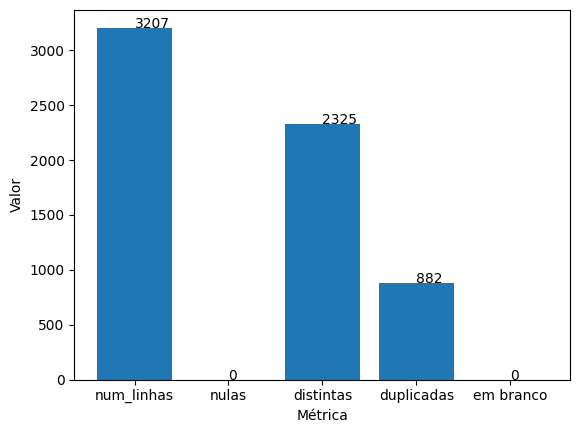

In [69]:
data = [
    df.shape[0],
    df["milage"].isnull().sum(),
    df["milage"].nunique(),
    df["milage"].duplicated().sum(),
    df["milage"].str.isspace().sum(),
]

index=["num_linhas", "nulas", "distintas", "duplicadas", "em branco"]

plt.bar(index, data)

plt.xlabel("Métrica")
plt.ylabel("Valor")

for i in range(len(data)):
    plt.annotate(str(data[i]), (index[i], data[i]))

plt.show()

In [70]:
df['milage'].str.split(" ", expand=True).head

<bound method NDFrame.head of             0    1
0      71,000  mi.
1      68,575  mi.
2      69,641  mi.
3      33,500  mi.
4      75,000  mi.
...       ...  ...
3202   52,105  mi.
3203   76,850  mi.
3204   74,150  mi.
3205   26,465  mi.
3206  125,000  mi.

[3207 rows x 2 columns]>

In [91]:
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype('int')

In [92]:
df.sort_values(by=['milage'], ascending=False)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
1690,Honda,Accord Sport,2013,405000,Gasoline,185.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,CVT Transmission,Black,Black,None reported,Yes,6000
881,Mercedes-Benz,Sprinter 2500,2016,399000,Diesel,188.0HP 3.0L V6 Cylinder Engine Diesel Fuel,5-Speed A/T,Silver,–,At least 1 accident or damage reported,Yes,24500
2902,Ford,Excursion Limited,2001,333361,Diesel,250.0HP 7.3L 8 Cylinder Engine Diesel Fuel,A/T,Black,Beige,At least 1 accident or damage reported,Yes,17000
477,Ford,F-250 XL Crew Cab Super Duty,2004,315000,Diesel,325.0HP 6.0L 8 Cylinder Engine Diesel Fuel,A/T,White,Gray,None reported,Yes,9200
1713,Dodge,Ram 1500 Laramie Mega Cab,2006,300183,Gasoline,345.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Gray,At least 1 accident or damage reported,Yes,10900
...,...,...,...,...,...,...,...,...,...,...,...,...
772,Ford,Transit-350 Base,2023,195,Gasoline,310.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,87500
1657,Rivian,R1S Adventure Package,2023,159,NaN,533.0HP Electric Motor Electric Fuel System,A/T,White,Black,None reported,Yes,95500
1995,BMW,M3 CS,2024,124,Gasoline,543.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Green,Black,None reported,Yes,145000
1786,Rolls-Royce,Cullinan,2022,115,Gasoline,6.7L V12 48V GDI DOHC Twin Turbo,8-Speed Automatic,–,Grace White,None reported,Yes,449995


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   int32 
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int32(1), int64(2), object(9)
memory usage: 288.3+ KB


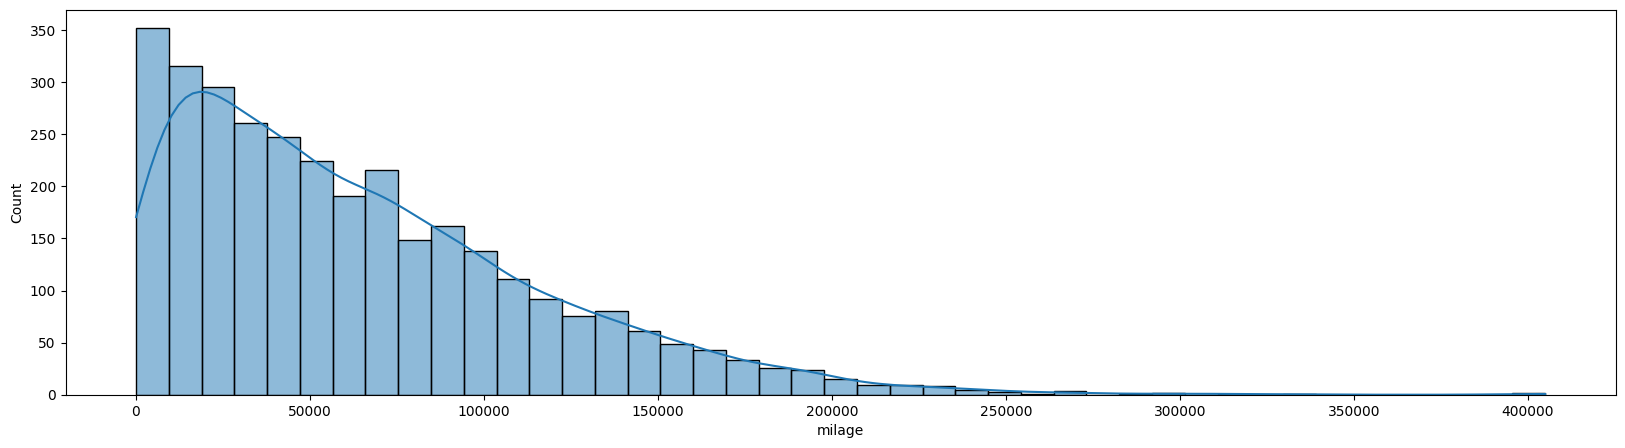

In [94]:
fig, axes = plt.subplots(1,1, figsize = (20,5))

sns.histplot(data=df['milage'], ax = axes, kde=True)

plt.show()

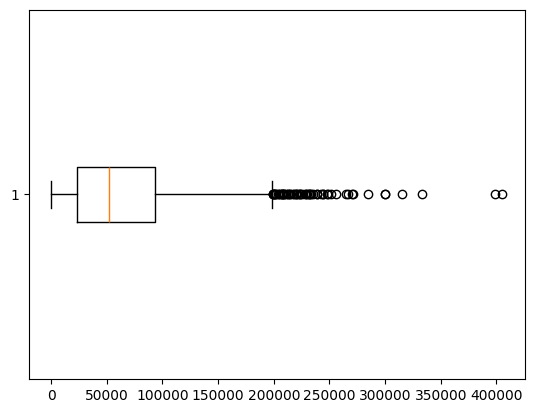

In [96]:
plt.boxplot(df['milage'], vert=False)

plt.show()

In [87]:
filtro = df['model_year'] < 2000
count = filtro.sum()
print(count)


54


In [80]:
df['milage'].describe()

count      3207.000000
mean      64594.983785
std       52387.260707
min         100.000000
25%       23151.500000
50%       52253.000000
75%       93450.000000
max      405000.000000
Name: milage, dtype: float64